### On December 2019 a pandemic event forced human beings to face for 5 years this contagious illness. Since then, many vaccines were created to cope with this deadly virus but, few information regarding the survivance of individuals and the illnesses related was known. In this project I examine some of the illnesses of 550 individuals that were vaccinated thrice and the outcomes. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart_attack_vaccine_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient ID               550 non-null    int64  
 1   Age                      550 non-null    int64  
 2   Gender                   550 non-null    object 
 3   Vaccination Date         550 non-null    object 
 4   Vaccine Dose             550 non-null    object 
 5   Pre-existing Conditions  479 non-null    object 
 6   Heart Attack Date        153 non-null    object 
 7   Severity                 153 non-null    object 
 8   Outcome                  153 non-null    object 
 9   Location                 550 non-null    object 
 10  Blood Pressure           550 non-null    object 
 11  Cholesterol Level        550 non-null    int64  
 12  BMI                      550 non-null    float64
 13  Smoking History          550 non-null    object 
 14  Diabetes Status          5

In [4]:
df.sample(10)

,Patient ID,Age,Gender,Vaccination Date,Vaccine Dose,Pre-existing Conditions,Heart Attack Date,Severity,Outcome,Location,Blood Pressure,Cholesterol Level,BMI,Smoking History,Diabetes Status
244,245,41,Male,2021-01-06,Booster,Smoking,2021-08-27,Severe,Survived,Kolkata,Normal,162,26.5,Yes,Yes
106,107,78,Male,2023-03-13,2nd Dose,Obesity,NaN,NaN,NaN,Pune,Elevated,202,23.5,Yes,No
241,242,40,Female,2021-07-29,Booster,Multiple Conditions,NaN,NaN,NaN,Surat,Normal,257,19.2,Yes,Yes
124,125,29,Male,2023-03-27,2nd Dose,Obesity,NaN,NaN,NaN,Chennai,Normal,219,30.8,Yes,Yes
264,265,47,Male,2022-08-03,1st Dose,Multiple Conditions,NaN,NaN,NaN,Mumbai,High,152,20.8,Yes,No
309,310,29,Female,2023-09-23,2nd Dose,Multiple Conditions,NaN,NaN,NaN,Patna,High,255,24.2,No,No
290,291,38,Male,2022-08-30,Booster,Heart Disease,NaN,NaN,NaN,Agra,Normal,234,31.0,Yes,Yes
6,7,34,Male,2023-01-04,Booster,Obesity,NaN,NaN,NaN,Ludhiana,Very High,291,18.8,No,Yes
306,307,30,Female,2023-12-23,Booster,Heart Disease,NaN,NaN,NaN,Ahmedabad,Very High,161,27.2,Yes,No
252,253,47,Male,2022-04-02,Booster,Multiple Conditions,2022-12-05,Severe,Survived,Jaipur,Elevated,196,23.0,No,No


In [5]:
df['Vaccination Date'] = pd.to_datetime(df['Vaccination Date'], errors='coerce')  # Convert vaccination date to datetime

In [6]:
df['Heart Attack Date'] = pd.to_datetime(df['Heart Attack Date'], errors='coerce')  # Convert heart attack date to datetime

In [7]:
df['Pre-existing Conditions'].fillna('None', inplace=True)

In [8]:
df.describe()

,Patient ID,Age,Vaccination Date,Heart Attack Date,Cholesterol Level,BMI
count,550.000000,550.000000,550,153,550.000000,550.000000
mean,275.500000,52.098182,2022-07-14 21:07:12,2023-03-23 01:43:31.764705792,223.143636,26.803273
min,1.000000,25.000000,2021-01-04 00:00:00,2021-05-23 00:00:00,150.000000,18.500000
25%,138.250000,39.000000,2021-10-26 12:00:00,2022-06-06 00:00:00,187.000000,23.000000
50%,275.500000,52.000000,2022-07-11 00:00:00,2023-04-20 00:00:00,221.000000,26.550000
75%,412.750000,66.000000,2023-04-23 06:00:00,2023-11-29 00:00:00,258.000000,30.700000
max,550.000000,80.000000,2023-12-31 00:00:00,2024-12-05 00:00:00,300.000000,35.000000
std,158.915596,15.843192,NaN,NaN,43.267955,4.678322


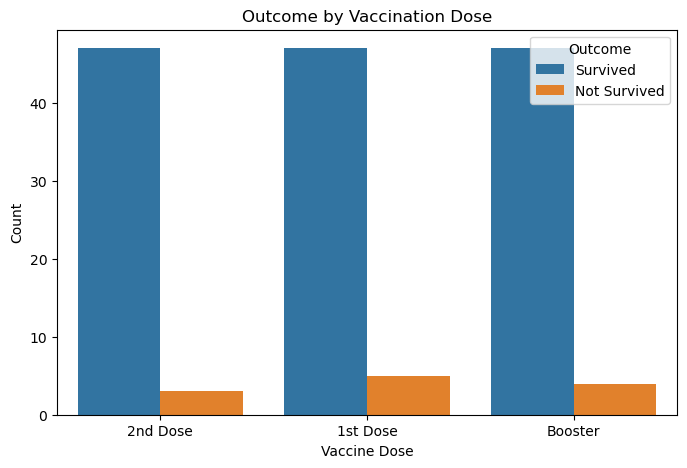

In [9]:
# Visualizaciones

# 1. Supervivencia por dosis aplicada
plt.figure(figsize=(8, 5))
sns.countplot(x='Vaccine Dose', hue='Outcome', data=df)
plt.title('Outcome by Vaccination Dose')
plt.xlabel('Vaccine Dose')
plt.ylabel('Count')
plt.show()

##### This graphic shows the outcome by vaccination dose, there's a clear increase in the survivance of people with any dose, it seems to be a bigger survival with the second ans booster dose compared to the diseases with the first dose. 

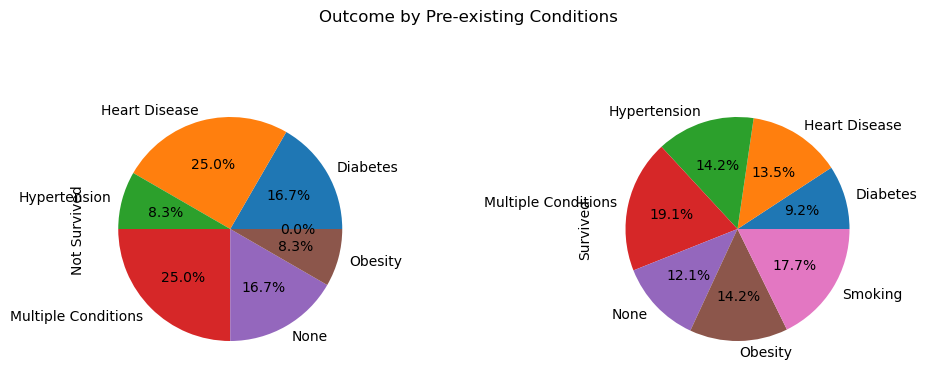

In [10]:
# 2. Supervivencia por condicion pre-existente (Pie chart)
outcome_by_condition = df.groupby('Pre-existing Conditions')['Outcome'].value_counts().unstack().fillna(0)
outcome_by_condition.plot(kind='pie', subplots=True, layout=(2, 2), figsize=(12, 8), autopct='%1.1f%%', legend=False)
plt.suptitle('Outcome by Pre-existing Conditions')
plt.show()

##### The pre-existing condition asociated with higher mortality rate is heart disease and multiple conditions. On the other hand, obesity and smoking do not detemine the outcome.

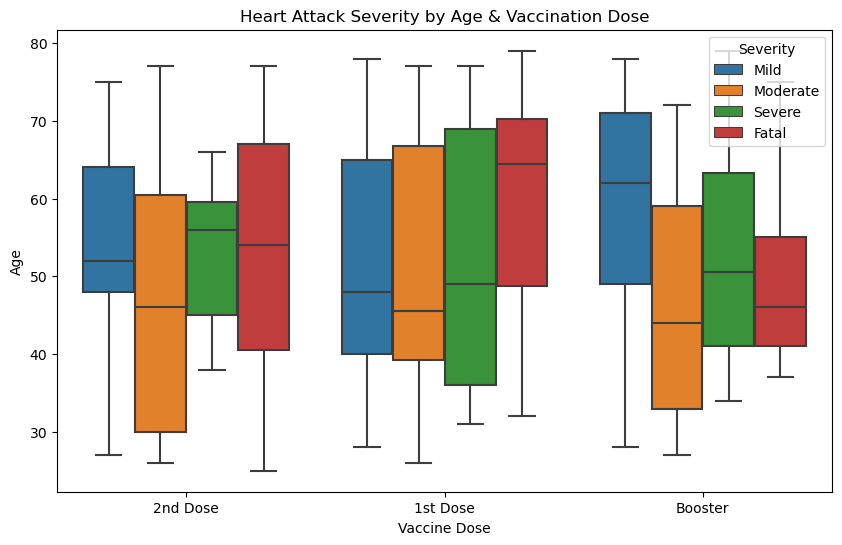

In [11]:
# 3. Severidad del ataque cardiaco por edad y dosis de vacuancioón (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vaccine Dose', y='Age', hue='Severity', data=df)
plt.title('Heart Attack Severity by Age & Vaccination Dose')
plt.xlabel('Vaccine Dose')
plt.ylabel('Age')
plt.show()

##### Apparently the dose increases the range age at which a fatal heart attack can happen, in the booster treatment the mid age for a fatal heart attack is between 40 and 50 compared to the first dose which is between 60 & 70. 

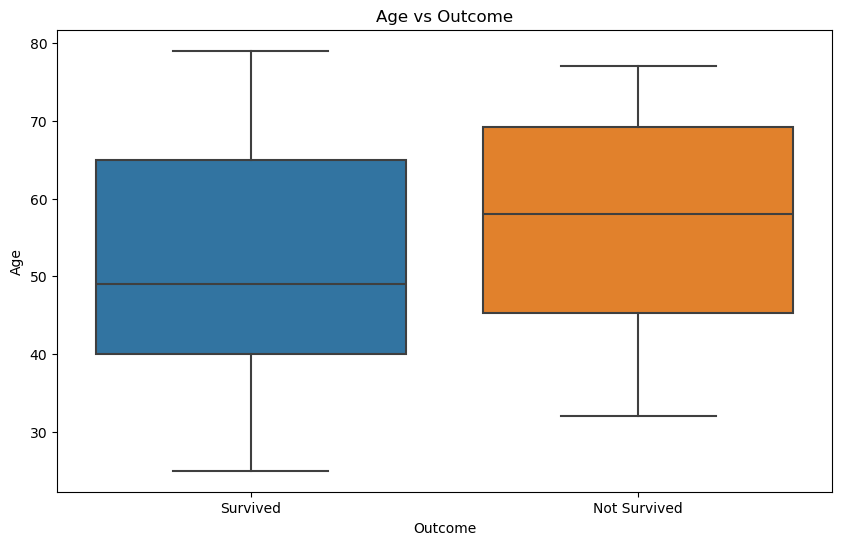

In [12]:
# 4. Supervivencia por edad (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Age', data=df)
plt.title('Age vs Outcome')
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.show()

##### The mid age for letal outcome is near 60, and the mid age of the surviving group is little under 50 

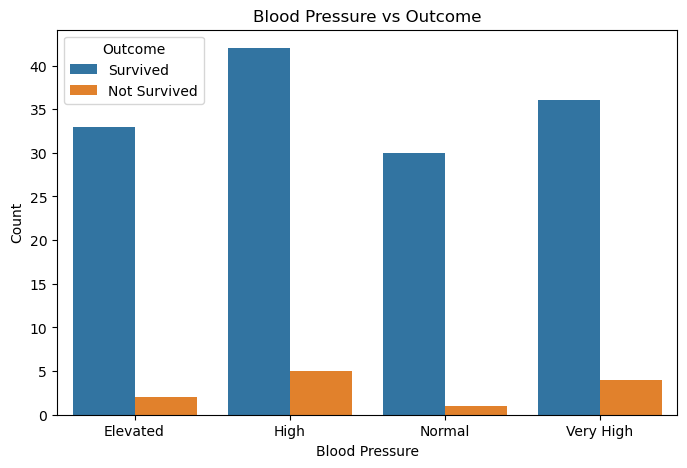

In [13]:
# 5. Nivel de presión arterial vs Supervivencia (Bar Plot)
plt.figure(figsize=(8, 5))
sns.countplot(x='Blood Pressure', hue='Outcome', data=df)
plt.title('Blood Pressure vs Outcome')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.show()

##### Here's a demonstration that hipertantion does not affect a fatal outcome

C:\Users\Gal_M\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


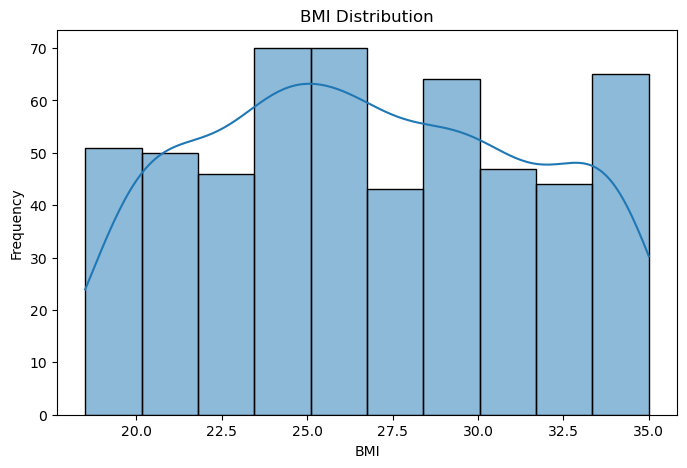

In [14]:
# 6. Distribución del IMC (indice masa corporal)
plt.figure(figsize=(8, 5))
sns.histplot(df['BMI'], kde=True, bins=10)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

##### People in this study fits in a broad range of BMI measurements, the measeurement with higher frequency was between 24 and 26, followed by 33 to 35 as well as 28 to 30. 

### Further analysis need to be done; however, we can conclude that vaccination significantly increases life span (including 1st adn 2nd dose), except when the patient's health is compromised due to heart diseases, diabetes, and multiple conditions.